## https://colab.research.google.com/drive/1iYuRIbOiQte8kGbKm2oqnK2mgCTW08FM?usp=drive_link

In [1]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

def nonmax_suppression(sobel, direct):      #비 최대치 억제 함수
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):      # 행렬 처리를 통해 이웃 화소 가져오기
            values = sobel[i-1:i+2, j-1:j+2].flatten()
            first = [3, 0, 1, 2]
            id = first[direct[i, j]]
            v1, v2 = values[id], values[8-id]
            dst[i, j] = sobel[i, j] if (v1 < sobel[i , j] > v2) else 0

    return dst

def trace(max_sobel, i, j, low, pos_ck, canny):
    h, w = max_sobel.shape
    if (0 <= i < h and 0 <= j < w) == False: return  # 추적 화소 범위 확인
    if pos_ck[i, j] == 0 and max_sobel[i, j] > low:
        pos_ck[i, j] = 255
        canny[i, j] = 255

        trace(max_sobel, i - 1, j - 1, low, pos_ck, canny)        # 추적 함수 재귀 호출 - 8방향 추적
        trace(max_sobel, i    , j - 1, low, pos_ck, canny)
        trace(max_sobel, i + 1, j - 1, low, pos_ck, canny)
        trace(max_sobel, i - 1, j    , low, pos_ck, canny)
        trace(max_sobel, i + 1, j    , low, pos_ck, canny)
        trace(max_sobel, i - 1, j + 1, low, pos_ck, canny)
        trace(max_sobel, i    , j + 1, low, pos_ck, canny)
        trace(max_sobel, i + 1, j + 1, low, pos_ck, canny)

def hysteresis_th(max_sobel, low, high):                # 이력 임계값 수행
    pos_ck = np.zeros(image.shape[:2], np.uint8)
    canny = np.zeros(image.shape[:2], np.uint8)

    rows, cols = max_sobel.shape[:2]
    for i in range(1, rows - 1):  # 에지 영상 순회
        for j in range(1, cols - 1):
            if max_sobel[i, j] > high:  trace(max_sobel, i, j, low, pos_ck, canny)  # 추적 시작

    return canny

In [8]:
image = cv2.imread('/content/drive/MyDrive/패턴인식/PR201910769/images/car02.jpg', cv2.IMREAD_GRAYSCALE)

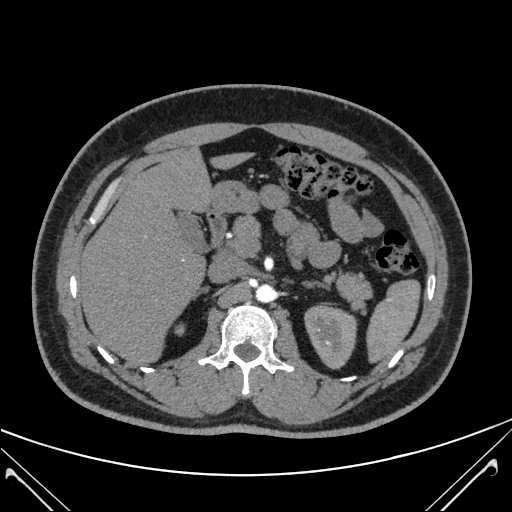

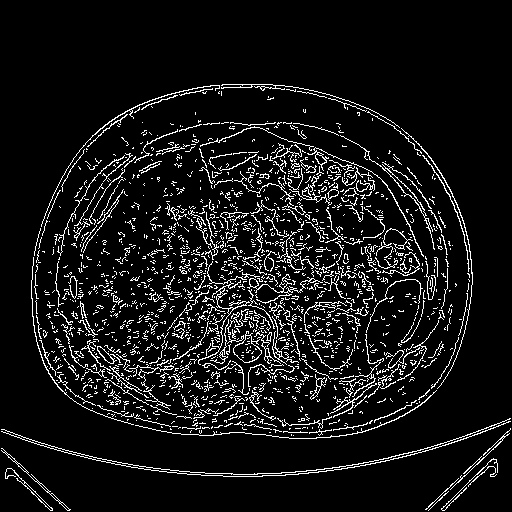

In [17]:
image = cv2.imread('/content/drive/MyDrive/패턴인식/PR201910769/images/CTscan.jpg', cv2.IMREAD_GRAYSCALE)

# 블러링 통한 노이즈 제거
gaus_img = cv2.GaussianBlur(image, (5, 5), 0.3)

# 화소 기울기의 강도와 방향 검출
Gx = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 1, 0, 3)  # x방향 마스크
Gy = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 0, 1, 3)  # y방향 마스크
## 강도
sobel = np.fabs(Gx) + np.fabs(Gy)  # 두 행렬 절댓값 덧셈
## 방향
directs = cv2.phase(Gx, Gy) / (np.pi / 4)
directs = directs.astype(int) % 4

# 비최대치 억제
max_sobel = nonmax_suppression(sobel, directs)   # 비최대치 억제

# 이력 임계처리
canny = hysteresis_th(max_sobel, 100, 150)          # 이력 임계값

cv2_imshow(image)
cv2_imshow(canny)

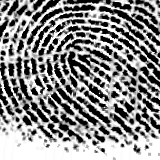

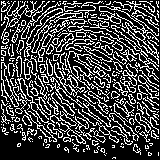

In [20]:
image = cv2.imread('/content/drive/MyDrive/패턴인식/PR201910769/images/fingerprint01.bmp', cv2.IMREAD_GRAYSCALE)

# 블러링 통한 노이즈 제거
gaus_img = cv2.GaussianBlur(image, (5, 5), 0.3)

# 화소 기울기의 강도와 방향 검출
Gx = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 1, 0, 3)  # x방향 마스크
Gy = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 0, 1, 3)  # y방향 마스크
## 강도
sobel = np.fabs(Gx) + np.fabs(Gy)  # 두 행렬 절댓값 덧셈
## 방향
directs = cv2.phase(Gx, Gy) / (np.pi / 4)
directs = directs.astype(int) % 4

# 비최대치 억제
max_sobel = nonmax_suppression(sobel, directs)   # 비최대치 억제

# 이력 임계처리
canny = hysteresis_th(max_sobel, 100, 150)          # 이력 임계값

cv2_imshow(image)
cv2_imshow(canny)

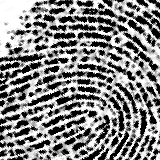

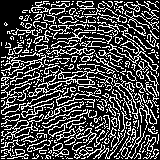

In [22]:
image = cv2.imread('/content/drive/MyDrive/패턴인식/PR201910769/images/fingerprint02.bmp', cv2.IMREAD_GRAYSCALE)

# 블러링 통한 노이즈 제거
gaus_img = cv2.GaussianBlur(image, (5, 5), 0.3)

# 화소 기울기의 강도와 방향 검출
Gx = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 1, 0, 3)  # x방향 마스크
Gy = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 0, 1, 3)  # y방향 마스크
## 강도
sobel = np.fabs(Gx) + np.fabs(Gy)  # 두 행렬 절댓값 덧셈
## 방향
directs = cv2.phase(Gx, Gy) / (np.pi / 4)
directs = directs.astype(int) % 4

# 비최대치 억제
max_sobel = nonmax_suppression(sobel, directs)   # 비최대치 억제

# 이력 임계처리
canny = hysteresis_th(max_sobel, 100, 150)          # 이력 임계값

cv2_imshow(image)
cv2_imshow(canny)